### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
sns.set_style('whitegrid')

In [24]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [25]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [26]:
pct_to_target[0:10]

array([1.02, 1.14, 1.09, 1.06, 0.88, 0.91, 0.94, 1.12, 1.01, 0.95])

In [27]:
len(pct_to_target)

500

In [28]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [29]:
sales_target[0:10]

array([100000, 400000, 200000, 100000,  75000, 200000,  75000, 100000,
       300000, 200000])

In [30]:
len(sales_target)

500

In [31]:
# Show how to create the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,1.02,100000
1,1.14,400000
2,1.09,200000
3,1.06,100000
4,0.88,75000


In [32]:
df.size

1000

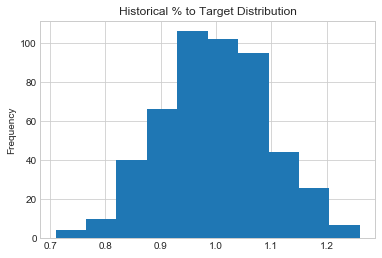

In [33]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

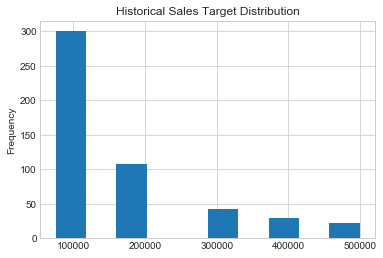

In [34]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [35]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [36]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [37]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [38]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,1.02,100000,102000.0,0.04
1,1.14,400000,456000.0,0.04
2,1.09,200000,218000.0,0.04
3,1.06,100000,106000.0,0.04
4,0.88,75000,66000.0,0.02


In [39]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [40]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.02,100000,102000.0,0.04,4080.0
1,1.14,400000,456000.0,0.04,18240.0
2,1.09,200000,218000.0,0.04,8720.0
3,1.06,100000,106000.0,0.04,4240.0
4,0.88,75000,66000.0,0.02,1320.0


In [41]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

82389250.0 2817912.5 82800000


In [42]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.996540,165600.000000,164778.500000,0.033460,5635.825000
std,0.097569,116935.828453,116911.976003,0.007506,4456.607469
min,0.710000,75000.000000,53250.000000,0.020000,1065.000000
25%,0.930000,75000.000000,81000.000000,0.030000,2872.500000
50%,1.000000,100000.000000,104000.000000,0.040000,4080.000000
75%,1.070000,200000.000000,212000.000000,0.040000,8080.000000
max,1.260000,500000.000000,585000.000000,0.040000,23400.000000


### Show Full Example of the simulation

In [43]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [44]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [45]:
results_df.head()

,Sales,Commission_Amount,Sales_Target
0,81796750.0,2802108.0,81525000
1,82829500.0,2787992.0,83050000
2,82696750.0,2748752.0,83550000
3,86521250.0,2914855.0,87200000
4,88492500.0,3031815.0,88750000


In [46]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,766,761.0","2,857,487.0","83,794,650.0"
std,"2,735,945.0","103,037.0","2,685,509.0"
min,"73,584,250.0","2,495,638.0","73,525,000.0"
25%,"81,915,812.0","2,788,876.0","81,975,000.0"
50%,"83,846,250.0","2,862,165.0","83,850,000.0"
75%,"85,648,812.0","2,927,071.0","85,600,000.0"
max,"93,096,750.0","3,199,225.0","92,825,000.0"


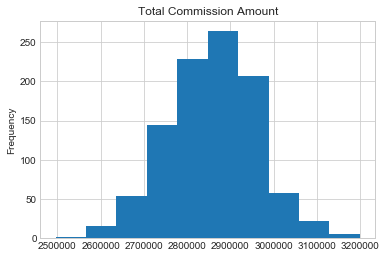

In [47]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

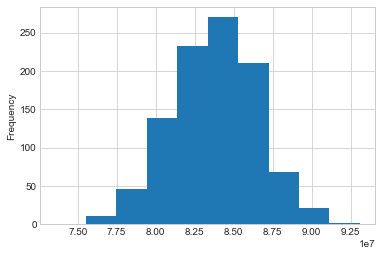

In [48]:
results_df['Sales'].plot(kind='hist')